<center><h1>A Canonical Small Open Economy (SOE) Model: An Open Endowment Economy</h1></center>

<div style="text-align: center;">
  <a href="https://sites.google.com/view/ciroeduardobazannavarro/home" style="font-weight: bold; text-decoration: underline;">Dr. Ciro Eduardo Bazán Navarro</a>
</div>

<center>November 2025</center>

<p style="text-align: justify;">In this notebook, I examine a standard dynamic general-equilibrium model of a small open endowment economy with incomplete international financial markets, closelly following the frameworks of Lubik (2007) and Uribe & Schmitt-Grohé (2017).</p>

<p style="text-align: justify;">Open-economy models usually feature an international financial asset—most commonly a one-period risk-free bond—that residents of a small country can buy or sell freely without affecting its price or the world interest rate. This feature essentially defines a “small” economy, one too small to influence international prices (McCandless, 2008). Yet, when such a risk-free asset is included in a stochastic small open economy with incomplete markets—where households only have access to this single bond and cannot diversify risk—the model becomes nonstationary, as equilibrium dynamics inherit a random-walk component.</p>

<p style="text-align: justify;">Within this setting, the goals are: (i) to analytically solve the model’s linearized SOE system, (ii) to show that the unconditional variances of debt, the trade balance, and consumption are not finite (they diverge in the long run), and (iii) to build Dynare code capable of numerically simulating the economy’s response in steady state to a temporary stochastic endowment disturbance—considering two cases: Case 01 with i.i.d. endowment shocks and Case 02 with an AR(1) endowment process.</p>


## Model Assumptions 
* <p style="text-align: justify;">The economy is inhabited by a continuum of identical households. They have the same preferences, receive the same stochastic endowment, face the same international interest rate, and are subject to the same budget constraint and uncertainty. Since all households are identical, their aggregate decisions are simply the decisions of any single household multiplied by the measure of the population. Therefore, it is possible to study only one of them and refer to it as the representative household.</p> 
* <p style="text-align: justify;">In each period, the representative household receives an exogenous but stochastic endowment of perishable goods—that is, goods that are non-accumulable and non-storable (there is no capital accumulation), and can only be consumed within the same period. This endowment does not depend on capital or labor inputs. Hence, in this economy, there is no production activity and no decisions regarding factor inputs; the household simply takes as given that amount of goods available each period. Since there is no capital accumulation and only a single consumption good, one unit of the consumption good corresponds to one unit of real income.</p> 
* <p style="text-align: justify;">Households have access to an internationally traded risk-free bond, which they use to borrow or lend so as to smooth consumption over time in response to stochastic endowment (income) shocks. Since income is measured in units of the consumption good, consumption smoothing naturally induces equilibrium fluctuations in the trade balance and the current account.</p> 
* <p style="text-align: justify;">The preferences of the representative household, $𝑈$, that is, the expected value of the sum of the current utility and future utility flows discounted to the current period, are given by:</p> 
$$ U=E_0\sum_{t=0}^{\infty}{\beta^tu\left(c_t\right)}; 𝛽∈(0,1) \tag{1}$$ 
<p style="text-align: justify;">Where $𝐸_𝑡 (∙)$ are the mathematical expectations conditioned on the information available in period $𝑡$, and $\beta$ is the subjective (constant) intertemporal discount factor. The utility $𝑢(c_𝑡)$ of the representative household depends on the consumption $c_𝑡$ in period $𝑡$, is time-separable, twice continuously differentiable, strictly increasing $u'(c_t)>0$, strictly concave $u''(c_t)<0$, and satisfies the following conditions:</p> \begin{equation} \lim_{c_t \to 0} u'(c_t) = +\infty, \qquad \lim_{c_t \to \infty} u'(c_t) = 0. \tag{Inada conditions} \end{equation} 
* <p style="text-align: justify;">Similar to Uribe & Smichtt-Grohé (2017), the budget constraint of the representative household, period by period, takes the following form:</p> 
$$c_t+R_{t-1}d_{t-1}= y_t+d_t\tag{2}$$
<p style="text-align: justify;">Where $d_t$ is the debt of the representative household at the end of period 𝑡 (at time 𝑡), which must be repaid at the beginning of period 𝑡+1 (at time 𝑡+1); $c_𝑡$ is consumption of period 𝑡, $R_t=1+r_t$ represents the international gross interest rate (the total gross return factor on debt) between periods 𝑡 and 𝑡+1, consiting of the principal (1) plus the international net interest rate at which the household can borrow or save through external bonds $r_t$; and $y_𝑡$ is the exogenous and stochastic endowment of goods (it does not depend on the stock of physical capital or labor). Equation (2) states that, in each period 𝑡, the sum of consumption and past debt service equals the sum of exogenous endowment (the household’s available resources) and new debt.
</p> <div class="alert alert-block alert-info"> <b>Note 01:</b> <p style="text-align: justify;">Alternatively, if $𝑏_𝑡$ denotes net foreign assets (international bonds) at the end of period 𝑡, and I define positive debt $d_t>0$ as the case in which the representative household owes bonds to foreign countries (i.e., is in debt to the rest of the world), then $b_t=-d_t$. Therefore, as in Lubik (2007), it is possible to write equation (2) as: $c_t+b_t= y_t+R_{t-1}b_{t-1}$. This alternative formulation of equation (2) states that, in each period 𝑡, total uses of resources (consumption and accumulation of assets) equal total sources of resources (current endowment and the return on previously accumulated assets). If $b_t > 0$: the representative household owns foreign bonds (is a creditor to the rest of the world) → it receives interest at a rate $r_t$. If $b_t < 0$: the representative household owes foreign bonds (is a debtor to the rest of the world) → it pays interest at a rate $r_t$.</p>
</div> 
* <p style="text-align: justify;">To eliminate the possibility that the representative household could indefinitely incur debt and refinance its debt ad infinitum (i.e., participate in Ponzi schemes), it will be assumed that the representative household is subject to a natural debt limit. Households are assumed to be subject to the following sequence of borrowing constraints that prevent them from engaging in Ponzi schemes (Condition preventing a Ponzi scheme or condition of transversality):</p> 
$$\lim_{n\to\infty}E_t\left[ \frac{d_{t+n}}{{R_t}^n}\right] = 0\tag{3}$$ 
* The initial condition is: $$d_{-1}\lesseqgtr 0\tag{4}$$

## Representative household optimization problem

<p style="text-align: justify;">The representative household chooses sequence of processes $\left\{ c_t, d_t \right\}_{t=0}^{\infty}$ to maximize its preferences subject to sequential budget constrint and the transversality condition.</p>

$$\\\max_{\{c_t,\,d_t\}}  U=\max_{\{c_t,\,d_t\}} \; E_0 \sum_{t=0}^{\infty} \beta^t \, u(c_t)\tag{5}$$
$\quad \text{s.t.}$
$$y_t+ d_t =c_t+ R_{t-1}d_{t-1}  $$

Equivalently, the representative household maximises the following Lagrangian:

$$\\\max_{({c_t,d_t,\lambda_t})} \mathcal{L}=\max_{ ({c_t,d_t,\lambda_t})}\; E_0 \sum_{t=0}^{\infty} \beta^t [ u(c_t) + \lambda_t( y_t+ d_t- c_t - R_{t-1}d_{t-1} ) ]\tag{6}$$

The first-order necessary conditions for optimality are given by:

$$\partial \mathcal{L}/\partial c_t= \; \beta^t(u'(c_t) - \lambda_t )= 0 \;\Leftrightarrow \; \lambda_t = u'(c_t)\;\Rightarrow\;\lambda_{t+ 1}= u'(c_{t+1})\ \tag{7}$$

$$\partial \mathcal{L}/\partial d_t= \; \beta^t\lambda_t -\beta^{t+1}(R_t E_t[\lambda_{t+1}]) = 0\;\Leftrightarrow \;\lambda_t=\beta R_t E_t[\lambda_{t+1}]\tag{8}$$

$$\partial \mathcal{L}/\partial \lambda_t= \; \beta^t( y_t+ d_t- c_t - R_{t-1}d_{t-1})=0\;\Leftrightarrow \;y_t+ d_t =c_t+ R_{t-1}d_{t-1}\tag{9}$$

Equations (6) and (7) give Euler's equation:

$$u^\prime\left(c_t\right)=\beta R_t E_t\left[u^\prime\left(c_{t+1}\right)\right]\tag{10}$$

* Now, it is assumed that the gross international interest rate is constant and greater than one. That is:
  
$$R_{t-1}=R_t=R^*=1+r^*>1\tag{11}$$

Substituting equation (10) into (9) yields the following:

$$u^\prime\left(c_t\right)=\beta R^* E_t\left[u^\prime\left(c_{t+1}\right)\right]=\beta (1+r^*) E_t\left[u^\prime\left(c_{t+1}\right)\right]\tag{12}$$

## Rational Expectations Equilibrium

<p style="text-align: justify;">Following Uribe and Smichtt-Grohé (2017), it has been assumed that all households share identical preferences, experience the same endowment process, and hold the same initial asset positions. Consequently, $c_t$ and $d_t$ can be viewed as per capita aggregate consumption and net foreign debt, respectively. Given these assumptions, a rational expectations equilibrium is defined as a sequence of processes $\left\{ c_t, d_t \right\}_{t=0}^{\infty}$ that satisfy equations (3), (9), and (12), given the initial condition $d_{−1}$ and the exogenous sequence $\left\{y_t \right\}_{t=0}^{\infty}$.</p>


<p style="text-align: justify;">Given the equilibrium processes of consumption and debt, the equilibrium process of the trade balance $tb_t$ can be costruct from its definition (the gap between a country’s exports and imports of goods and services):</p>

$$tb_t=y_t-c_t\tag{13}$$

<p style="text-align: justify;">According to Uribe and Smichtt-Grohé (2017), in the context of the current model, in which only one good is produced, in each period the economy exports or imports this good depending on whether its supply exceeds or is lower than domestic consumption. Therefore, as shown in equation (13), the trade balance can be determined as the difference between production and consumption. </p>

<p style="text-align: justify;">Furthermore, the current account $ca_t$ is equal to the trade balance less interest payments on the external debt from the previous period:</p>

$$ca_t=tb_t-(R_{t-1}-1)d_{t-1}=tb_t-r_{t-1}d_{t-1}\tag{14}$$

<p style="text-align: justify;">A trade balance surplus (positive) generates additional resources that can be used to reduce external debt or increase assets. If a country has a trade balance surplus sufficient to cover its debt interest payments, the current account balance will be zero (constant external position). If the trade balance surplus is larger than its debt interest payments, the current account balance is positive (debt reduction or asset growth). If the trade balance surplus is smaller or there is a trade balance deficit, the current account balance is negative (debt increase).</p>

<div class="alert alert-block alert-info">
<b>Note 02:</b> <p style="text-align: justify;"> The non-linear model can be summarised as follows:
    
\begin{equation}
\left\{
\begin{aligned}
&u^\prime\left(c_t\right)=\beta R^* E_t\left[u^\prime\left(c_{t+1}\right)\right]=\beta (1+r^*)E_t\left[u^\prime\left(c_{t+1}\right)\right]\\
&y_t+ d_t =c_t+ R_{t-1}d_{t-1}\\
&\lim_{n\to\infty}E_t\left[\frac{ d_{t+n}}{{R_t}^n}\right] = 0\\
&tb_t=y_t-c_t\\
&ca_t=tb_t-(R_{t-1}-1)d_{t-1}=tb_t-r_{t-1}d_{t-1}\\
\end{aligned}
\right.
\tag{*}
\end{equation}</p>
</div>

## Non-stochastic Steady-State

<p style="text-align: justify;">In the steady-state equilibrium of the model, all variables are constant: $ y_t = y^{ss}, \quad c_t = c^{ss},   \quad d_t = d^{ss}, \quad ca_{t} = ca^{ss}, \quad tb_{t} = tb^{ss}, \quad \forall t$. This means that the present, past and future values of each variable coincide with its stationary value at that fixed point. In this state, there are no shocks and no changes over time, and conditional expectations satisfy, for any horizon $j\geq0$, the following property: $E_t[y_{t+j}] = y^{ss}$, $E_t[c_{t+j}] = c^{ss}$, $E_t[d_{t+j}] = d^{ss}$, $E_t[ca_{t+j}] = ca^{ss}$, and $E_t[tb_{t+j}] = tb^{ss}$.</p>
    
<div class="alert alert-block alert-info">
<b>Note 03:</b> <p style="text-align: justify;"> This property is characteristic of the fixed point -It is only verified if the economy is in a steady state (if there are no shocks with expected value other than zero)-. Outside the steady state, conditional expectations depend on the stochastic dynamics of the model and the information $I_t$ available at $t$.</p>
</div>

Based on equation (12), for a steady state to exist, the following must be true:

$$u^\prime\left(c^{ss}\right)=\beta R^* E_t\left[u^\prime\left(c^{ss}\right)\right]=\beta (1+r^*) E_t\left[u^\prime\left(c^{ss}\right)\right]$$

$$u^\prime\left(c^{ss}\right)=\beta R^* u^\prime\left(c^{ss}\right)=\beta (1+r^*) u^\prime\left(c^{ss}\right)$$

$$1=\beta R^*=\beta (1+r^*)\;\Leftrightarrow \;R^*=\frac{1}{\beta}\;\Rightarrow\;r^*=\frac{1-\beta}{\beta}\tag{15}$$

<div class="alert alert-block alert-info">
<b>Note 04:</b> <p style="text-align: justify;"> As Lubik (2007) points out, the restriction given by (15) "is problematic both theoretically and empirically; there is no guarantee or mechanism in the model that enforces this steady-state restriction to hold".</p>
</div>

Based on equations (9) and (11), in a steady state, the following must be verified:

$$y^{ss}+ d^{ss} =c^{ss}+ R^*d^{ss}\;\Rightarrow\;c^{ss}=y^{ss}+(1- R^*)d^{ss}\tag{16}$$

Replacing equation (15) into (16) gives the following:

$$c^{ss}=y^{ss}-\left(\frac{1-\beta}{\beta}\right)d^{ss}>0\;\Leftrightarrow\;d^{ss}<\left(\frac{\beta}{1-\beta}\right)y^{ss}\tag{17}$$

<div class="alert alert-block alert-info">
<b>Note 05:</b> <p style="text-align: justify;"> Under the assumption of strictly positive consumption, inequality (17) represents the constraint on the admissible level of debt in steady state. 
Furthermore, to paraphrase Lubik (2007), "the steady-state level of debt, $d^{ss}$, is not determined by the model's optimality conditions. Instead, there is a multiplicity of steady states indexed by the initial condition $d^{ss}= d_{−1}$."</p>
</div>

Based on equations (13) and (16), in a steady state, the following must be verified:

$$tb^{ss}=y^{ss}-c^{ss}=\left(\frac{1-\beta}{\beta}\right)d^{ss}\tag{18}$$

Replacing (11) into (14) and taking into account (15) and (18), in a steady state, the following must be true:

$$ca^{ss}=tb^{ss}-(R^*-1)d^{ss}=tb^{ss}-r^*d^{ss}=tb^{ss}-\left(\frac{1-\beta}{\beta}\right)d^{ss}=0\tag{19}$$



## Linearization of the model

To linearise the model around its steady state, the following definitions are applied:

\begin{equation}
\left\{
\begin{aligned}
&\tilde c_t =\frac{c_t-c^{ss}}{c^{ss}}\approx \ln c_t - \ln c^{ss}\\
&\hat c_t = c_t - c^{ss} \approx c^{ss}\tilde c_t\;\Leftrightarrow\;c^{ss}\neq0\\
&\tilde y_t =\frac{y_t-y^{ss}}{y^{ss}}\approx \ln y_t - \ln y^{ss}\\
&\hat y_t = y_t - y^{ss} \approx y^{ss}\tilde y_t\;\Leftrightarrow\;y^{ss}\neq0\\
&\hat d_t = d_t - d^{ss}\\
&\hat {ca}_t = ca_t - ca^{ss}\\
&\hat {tb}_t = tb_t - tb^{ss}\\
\end{aligned}
\right.
\tag{20}
\end{equation}

Substituting (15) into (12) yields the following:

$$u^\prime\left(c_t\right)=E_t\left[u^\prime\left(c_{t+1}\right)\right]\tag{21}$$

Now, applying the first-order Taylor expansion around $c^{ss}$, equation (21) is linearised as follows:

$$u'(c^{ss})+ u''(c^{ss}) \hat c_t \approx E_t\left[u'(c^{ss})+ u''(c^{ss}) \hat c_{t+1} \right]$$

$$u'(c^{ss})+ u''(c^{ss}) \hat c_t \approx u'(c^{ss})+ u''(c^{ss}) E_t\left[\hat c_{t+1}\right]$$

$$ \hat c_t \approx E_t\left[\hat c_{t+1}\right]\tag{22}$$

<div class="alert alert-block alert-info">
<b>Note 06:</b> <p style="text-align: justify;"> <p style="text-align: justify;">Equation (22) tells us that consumption follows a random walk. At any given time, the representative household expects the consumption level for the next period to be equal to the current consumption level. In the linearized small open economy model, the emergence of a random walk in external debt does not depend on the specific functional form of the utility function, as long as utility is time-separable, strictly increasing, strictly concave, and twice continuously differentiable. Under these conditions, when the discount factor satisfies $𝛽(1+𝑟^*)=1$, the Euler equation collapses into a martingale condition for marginal utility, implying that consumption and external debt follow non-stationary (I(1)) dynamics. This result holds for all standard preference classes, including CRRA, CARA, and HARA specifications.</p></p>
</div>

Now, considering equation (20), equation (22) is expressed as follows:

$$ c^{ss}\tilde c_t\ \approx E_t\left[c^{ss} \tilde c_{t+1}\right]$$

\begin{equation}
\boxed{% 
\tilde c_t\ \approx E_t\left[\tilde c_{t+1}\right]}\tag{23}
\end{equation}

<p style="text-align: justify;">Taking into account equations (11), (15), (16) and (20), equation (9) is linearised as follows:</p>

$$y^{ss}+\hat y_t+ d^{ss}+\hat d_t =c^{ss}+\hat c_t+ R^*(d^{ss}+\hat d_{t-1})$$

$$\hat y_t+y^{ss}+(1-R^*) d^{ss}+\hat d_t =c^{ss}+\hat c_t+ R^*\hat d_{t-1}$$

$$\hat y_t+\hat d_t =\hat c_t+ R^*\hat d_{t-1}$$

\begin{equation}
\boxed{%
\hat d_t =c^{ss} \tilde c_t\ + \left(\frac{1}{\beta}\right)\hat d_{t-1}\ -y^{ss} \tilde y_t\ }\tag{24}
\end{equation}


<p style="text-align: justify;">Taking into account equation (18), equation (13) is linearised as follows:</p>

$$\hat {tb}_t + {tb}^{ss}=\hat y_t+y^{ss}-\hat c_t-c^{ss}$$

\begin{equation}
\boxed{%
\hat {tb}_t =\hat y_t-\hat c_t }\tag{25}
\end{equation}

<p style="text-align: justify;">Taking into account equations (11), (15) and (19), equation (14) is linearised as follows:</p>

$$\hat ca_t + {ca}^{ss}=\hat {tb}_t + {tb}^{ss} -(R^*-1)(\hat d_{t-1} + d^{ss})=\hat {tb}_t + {tb}^{ss}-r^*(\hat d_{t-1} + d^{ss})$$

$$\hat ca_t + {ca}^{ss}=\hat {tb}_t + {tb}^{ss} -\left(\frac{1-\beta}{\beta}\right)(\hat d_{t-1} + d^{ss})$$

$$\hat ca_t + {ca}^{ss}=\hat {tb}_t + {tb}^{ss} -\left(\frac{1-\beta}{\beta}\right)\hat d_{t-1}-\left(\frac{1-\beta}{\beta}\right)d^{ss}$$

\begin{equation}
\boxed{%
\hat {ca}_t=\hat {tb}_t-\left(\frac{1-\beta}{\beta}\right)\hat d_{t-1} }\tag{26}
\end{equation}

<div class="alert alert-block alert-info">
<b>Note 07:</b> <p style="text-align: justify;"> The linearized model can be summarised as follows:

\begin{equation}
\left\{
\begin{aligned}
&\tilde c_t\ \approx E_t\left[\tilde c_{t+1}\right]\\
&\hat d_t =c^{ss} \tilde c_t\ + \left(\frac{1}{\beta}\right)\hat d_{t-1}\ -y^{ss} \tilde y_t\\\
&\lim_{n\to\infty}E_t\left[\frac{\hat d_{t+n}}{{R_t}^n}\right] = 0\\
&\hat {tb}_t=\hat y_t- \hat c_t\\
&\hat {ca}_t=\hat {tb}_t-\left(\frac{1-\beta}{\beta}\right)\hat d_{t-1}\\
\end{aligned}
\right.
\tag{**}
\end{equation}</p>
</div>


# Local uniqueness of equilibrium in rational expectations: Blanchard and Kahn conditions

<p style="text-align: justify;">To express the system of stochastic difference equations given by (23) and (24) in state-space form of the linearized model, equation (24) is brought forward one period, as shown below:</p>

$$
\hat d_{t+1} = c^{ss} \tilde c_{t+1} + \left(\frac{1}{\beta}\right)\hat d_t - y^{ss} \tilde y_{t+1} \tag{27}
$$

Taking into account equation (22), the expectation operator is applied to equation (27), as shown below:

$$
E_t[\hat d_{t+1}] = c^{ss}\tilde c_t + \left(\frac{1}{\beta}\right)\hat d_t - y^{ss} E_t[\tilde y_{t+1}] \tag{28}
$$

Equations (22) and (28) can be expressed as follows:

\begin{equation}
E_t\begin{bmatrix}\hat d_{t+1} \\ \tilde c_{t+1}\end{bmatrix}
=
\underbrace{\begin{bmatrix}\frac{1}{\beta} & c^{ss} \\ 0 & 1\end{bmatrix}}_{A}
\begin{bmatrix}\hat d_t \\ \tilde c_t\end{bmatrix}
+
\begin{bmatrix}-y^{ss} \\ 0\end{bmatrix}
E_t[\tilde y_{t+1}]
\tag{29}
\end{equation}

The eigenvalues of matrix $A$ are as follows:

$$
\det(A-\lambda I)
=
\begin{vmatrix}\frac{1}{\beta}-\lambda & c^{ss} \\ 0 & 1-\lambda \end{vmatrix}
= 0
\;\Rightarrow\;
\lambda_1 = 1, \quad \lambda_2 = \frac{1}{\beta} > 1
\tag{30}
$$

<div class="alert alert-block alert-info">
<b>Note 08:</b> <p style="text-align: justify;">In this model, $\hat d_t$ is a predetermined variable and $\tilde c_t$ is a non-predetermined variable. From (30), $\lambda_2$ is an unestable eigenvalue  (its module is greater than 1). According to Blanchard and Kahn (1980), since the number of unstable eigenvalues (equal to 1) coincides with the number of non-predetermined variables (equal to 1), this results in a unique equilibrium (saddle point) of rational expectations for all admissible parameter values. It is also observed that the eigenvalue $\lambda_1$ is equal to one (unit root).</p>
</div>



 

## Solution of the linearized model using forward iterations

Now, using forward iterations, the system (**) will be solved. From equation (24) for period 𝑡+1:

$$\hat d_{t+1} =c^{ss}\tilde c_{t+1}\ + \left(\frac{1}{\beta}\right)\hat d_t-y^{ss}\tilde y_{t+1}\;\Rightarrow\;\hat d_t=\beta(y^{ss}\tilde y_{t+1}\ -c^{ss}\tilde c_{t+1}+\hat d_{t+1})  \tag{31}$$

Taking into account equation (23), as shown below, the expectation operator is applied to equation (31):

$$E_t[\hat d_t]=\hat d_t=\beta y^{ss}E_t\left[ \tilde y_{t+1}\right]  -\beta c^{ss}E_t\left[ \tilde c_{t+1}\right]+\beta E_t[\hat d_{t+1}]=\beta y^{ss}E_t\left[ \tilde y_{t+1}\right]  -\beta c^{ss} \tilde c_t+\beta E_t[\hat d_{t+1}]\tag{32}$$

<p style="text-align: justify;">Taking into account the law of iterated expectations, $E_t[E_{t+i}(x_{t+j})]=E_t[x_{t+j}], \forall j \ge i \ge 0$, equation (32) is iterated forward for t+1, t+2,  t+3,…:</p>

From equation (32) for period 𝑡+1:

$$\hat d_{t+1}=\beta y^{ss}E_{t+1}\left[ \tilde y_{t+2}\right]  -\beta c^{ss}E_{t+1}\left[ \tilde c_{t+2}\right]+\beta E_{t+1}[\hat d_{t+2}]\tag{33}$$

Replacing (33) into (32) yields the following:

$$\hat d_t=\beta y^{ss}E_t\left[ \tilde y_{t+1}\right]-\beta c^{ss}\tilde c_t +\beta E_t\left[\beta y^{ss}E_{t+1}\left[ \tilde y_{t+2}\right]  -\beta c^{ss}E_{t+1}\left[ \tilde c_{t+2}\right]+\beta E_{t+1}[\hat d_{t+2}]\right]$$

$$\hat d_t=\beta y^{ss}E_t[\tilde y_{t+1}] +\beta^2y^{ss} E_t\Big[E_{t+1}[\tilde y_{t+2}]\Big]-\beta c^{ss} \tilde c_t-\beta^2c^{ss} E_t\Big[E_{t+1}[\tilde c_{t+2}]\Big] +\beta^2 E_t\Big[E_{t+1}[\hat d_{t+2}]\Big]$$

Applying the law of iterated expectations:

$$\hat d_t=\beta y^{ss}E_t[\tilde y_{t+1}] +\beta^2y^{ss} E_t[\tilde y_{t+2}]-\beta c^{ss} \tilde c_t-\beta^2c^{ss} E_t[\tilde c_{t+2}]+\beta^2 E_t[\hat d_{t+2}]\tag{34}$$

From equation (32) for period 𝑡+2:

$$\hat d_{t+2}=\beta y^{ss}E_{t+2}\left[ \tilde y_{t+3}\right]  -\beta c^{ss}E_{t+2}\left[ \tilde c_{t+3}\right]+\beta E_{t+2}[\hat d_{t+3}]\tag{35}$$

Sustituting (35) into (34) yields the following:

$$\hat d_t=\beta y^{ss}E_t[\tilde y_{t+1}] +\beta^2y^{ss} E_t[\tilde y_{t+2}]-\beta c^{ss}\tilde c_t -\beta^2c^{ss} E_t[\tilde c_{t+2}]+\beta^2 E_t\left[\beta y^{ss}E_{t+2}\left[ \tilde y_{t+3}]-\beta c^{ss}E_{t+2}[ \tilde c_{t+3}\right]+\beta E_{t+2}[\hat d_{t+3}]\right] $$

$$\hat d_t=\beta y^{ss}E_t[\tilde y_{t+1}] +\beta^2y^{ss} E_t[\tilde y_{t+2}]+\beta^3 y^{ss} E_t\Big[E_{t+2}\left[ \tilde y_{t+3}\right]\Big]-\beta c^{ss} \tilde c_t-\beta^2c^{ss} E_t[\tilde c_{t+2}]  -\beta^3 c^{ss}E_t\Big[E_{t+2}\left[ \tilde c_{t+3}\right]\Big]+\beta^3E_t\Big[ E_{t+2}[\hat d_{t+3}]\Big]$$

Applying the law of iterated expectations:

$$\hat d_t=\beta y^{ss}E_t[\tilde y_{t+1}] +\beta^2 y^{ss} E_t[\tilde y_{t+2}]+\beta^3 y^{ss} E_t[\tilde y_{t+3}]-\beta c^{ss} \tilde c_t -\beta^2c^{ss} E_t[\tilde c_{t+2}]-\beta^3 c^{ss}E_t[\tilde c_{t+3}]+\beta^3E_t[ \hat d_{t+3}]\tag{36}$$

From equation (32) for period 𝑡+3:

$$\hat d_{t+3}=\beta y^{ss}E_{t+3}[ \tilde y_{t+4}]  -\beta c^{ss}E_{t+3}[ \tilde c_{t+4}]+\beta E_{t+3}[\hat d_{t+4}]\tag{37}$$

Sustituting (37) into (36) gives the following:

\begin{align*}
\hat d_t &= \beta y^{ss} E_t[\tilde y_{t+1}] + \beta^2 y^{ss} E_t[\tilde y_{t+2}] + \beta^3 y^{ss} E_t[\tilde y_{t+3}] \\
&\quad - \beta c^{ss} \tilde c_t - \beta^2 c^{ss} E_t[\tilde c_{t+2}] - \beta^3 c^{ss} E_t[\tilde c_{t+3}] \\
&\quad + \beta^3 E_t \Big[ \beta y^{ss} E_{t+3}[\tilde y_{t+4}] - \beta c^{ss} E_{t+3}[\tilde c_{t+4}] + \beta E_{t+3}[\hat d_{t+4}] \Big]
\end{align*}

\begin{align*}
\hat d_t &= \beta y^{ss} E_t[\tilde y_{t+1}] + \beta^2 y^{ss} E_t[\tilde y_{t+2}] + \beta^3 y^{ss} E_t[\tilde y_{t+3}] + \beta^4 y^{ss} E_t\big[ E_{t+3}[\tilde y_{t+4}] \big] \\
&\quad - \beta c^{ss} \tilde c_t - \beta^2 c^{ss} E_t[\tilde c_{t+2}] - \beta^3 c^{ss} E_t[\tilde c_{t+3}] - \beta^4 c^{ss} E_t\big[ E_{t+3}[\tilde c_{t+4}] \big] 
+ \beta^4 E_t\big[ E_{t+3}[\hat d_{t+4}] \big]
\end{align*}

Applying the law of iterated expectations:

$$
\begin{equation}
\begin{gathered}
\hat d_t = \beta y^{ss} E_t[\tilde y_{t+1}] + \beta^2 y^{ss} E_t[\tilde y_{t+2}] + \beta^3 y^{ss} E_t[\tilde y_{t+3}] + \beta^4 y^{ss} E_t[\tilde y_{t+4}] \\
- \beta c^{ss} \tilde c_t - \beta^2 c^{ss} E_t[\tilde c_{t+2}] - \beta^3 c^{ss} E_t[\tilde c_{t+3}] - \beta^4 c^{ss} E_t[\tilde c_{t+4}] \\
+ \beta^4 E_t[\hat d_{t+4}]
\end{gathered}
\tag{38}
\end{equation}
$$

In general, after “n” iterations:

\begin{equation}
\hat{d}_t
=\sum_{j=1}^{\,n} \beta^{\,j}\,y^{ss}\,E_t\!\left[\widetilde{y}_{\,t+j}\right]
-\sum_{j=1}^{\,n} \beta^{\,j}\,c^{ss}\,E_t\!\left[\widetilde{c}_{\,t+j}\right]
+ \beta^{\,n}\,E_t\!\left[\hat{d}_{\,t+n}\right]
\tag{39}
\end{equation}

At the limit when “n” tends to infinity:

$$\hat d_t =\lim_{n\to\infty} \sum_{j=1}^{\,n} \beta^{\,j}\,y^{ss}\,E_t\!\left[\widetilde{y}_{\,t+j}\right]-\lim_{n\to\infty}\sum_{j=1}^{\,n} \beta^{\,j}\,c^{ss}\,E_t\!\left[\widetilde{c}_{\,t+j}\right]+\lim_{n\to\infty} \beta^{\,n}\,E_t\!\left[\hat{d}_{\,t+n}\right]$$

$$\hat d_t =\sum_{j=1}^{\,\infty} \beta^{\,j}\,y^{ss}\,E_t\!\left[\widetilde{y}_{\,t+j}\right]-\sum_{j=1}^{\,\infty} \beta^{\,j}\,c^{ss}\,E_t\!\left[\widetilde{c}_{\,t+j}\right]+\lim_{n\to\infty} \beta^{\,n}\,E_t\!\left[\hat{d}_{\,t+n}\right]\tag{40}$$

Taking into account that $R_t=R^*$ (Eq. 11) and that $\beta R^*=1$ (Eq. 15), transversality condition (Eq. 3) satisfies the following:

$$\lim_{n\to\infty}E_t\left[ \frac{d_{t+n}}{{R_t}^n}\right] =\lim_{n\to\infty}E_t\left[ \frac{d_{t+n}}{({R^*})^n}\right]=\lim_{n\to\infty}\beta^nE_t\left[d_{t+n}\right]=0\tag{41}$$

<p style="text-align: justify;">Taking into account equations (11) and (15), the transversality condition, and that 𝛽∈(0,1), the following holds for the linearised version of the representative household’s debt:</p> 


$$\lim_{n\to\infty}E_t\left[\frac{\hat d_{t+n}+dss}{{R_t}^n}\right] =\lim_{n\to\infty}E_t\left[\frac{\hat d_{t+n}+dss}{({R^*})^n}\right]=\lim_{n\to\infty} \beta^{\,n}\,E_t\!\left[\hat{d}_{\,t+n}+d^{ss}\right]=\lim_{n\to\infty} \beta^{\,n}\,E_t\!\left[\hat{d}_{\,t+n}\right]+d^{ss}\lim_{n\to\infty} \beta^{\,n}$$

$$\lim_{n\to\infty}E_t\left[\frac{\hat d_{t+n}+dss}{{R_t}^n}\right]=\lim_{n\to\infty} \beta^{\,n}\,E_t\!\left[\hat{d}_{\,t+n}\right]=0\tag{42}$$

<p style="text-align: justify;">Since $0<𝛽<1$, the term $𝛽^𝑛$ vanishes asymptotically, and the transversality condition ensures that the discounted expected debt converges to zero, thereby ruling out explosive or Ponzi-type paths for $\hat d_t$.</p>


Replacing (42) into (40) yields the following:

$$\hat d_t =\sum_{j=1}^{\,\infty} \beta^{\,j}\,y^{ss}\,E_t\!\left[\widetilde{y}_{\,t+j}\right]-\sum_{j=1}^{\,\infty} \beta^{\,j}\,c^{ss}\,E_t\!\left[\widetilde{c}_{\,t+j}\right]\tag{43}$$

Now, from equation (23), for t+1:

$$\tilde c_{t+1}\ \approx E_{t+1}\left[\tilde c_{t+2}\right]\tag{44}$$

Taking into account equation (21) and the law of iterated expectations, the expectation operator is applied to equation (40) as shown below:

$$ E_t[\tilde c_{t+1}] \approx \tilde c_t \approx E_t\Big[E_{t+1}\left[\tilde c_{t+2}\right]\Big]=E_t[\tilde c_{t+2}]\tag{45}$$

From equation (23), for t+2:

$$\tilde c_{t+2}\ \approx E_{t+2}\left[\tilde c_{t+3}\right]\tag{46}$$

Taking into account  the law of iterated expectations, the expectation operator is applied to equation (46) as shown below:

$$ E_t[\tilde c_{t+2}] \approx E_t\Big[E_{t+2}\left[\tilde c_{t+3}\right]\Big]=E_t[\tilde c_{t+3}]\tag{47}$$

From equations (45) and (47), the following equation is obtained:

$$ \tilde c_t \approx  E_t[\tilde c_{t+1}] \approx  E_t[\tilde c_{t+2}] \approx  E_t[\tilde c_{t+3}]\tag{48}$$

Iterating "j" times, the following expression is obtained:

$$ \tilde c_t \approx  E_t[\tilde c_{t+j}], \forall j \geq 0 \tag{49}$$

Equation (49) tells us that the representative household expect all future levels of consumption to be equal to its current level.

Replacing equation (49) into equation (43) yields the following:

$$\hat d_t =\sum_{j=1}^{\,\infty} \beta^{\,j}\,y^{ss}\,E_t\!\left[\widetilde{y}_{\,t+j}\right]-\sum_{j=1}^{\,\infty} \beta^{\,j}\,c^{ss}\,\tilde c_t$$

$$\hat d_t =\sum_{j=1}^{\,\infty} \beta^{\,j}\,y^{ss}\,E_t\!\left[\widetilde{y}_{\,t+j}\right]-\frac{\beta}{1-\beta}c^{ss}\tilde c_t \tag{50}$$

Sustituting equation (50) into equation (24) gives the following:

$$\sum_{j=1}^{\,\infty} \beta^{\,j}\,y^{ss}\,E_t\!\left[\widetilde{y}_{\,t+j}\right]-\frac{\beta}{1-\beta}c^{ss}\tilde c_t  =c^{ss} \tilde c_t\ + \left(\frac{1}{\beta}\right)\hat d_{t-1}\ -y^{ss} \tilde y_t$$

\begin{equation}
\boxed{%
\tilde c_t=\left(\frac{1-\beta}{c^{ss}}\right)\sum_{j=1}^{\,\infty} \beta^{\,j}\,y^{ss}\,E_t\!\left[\widetilde{y}_{\,t+j}\right]-\left(\frac{1-\beta}{\beta c^{ss}}\right)\hat d_{t-1}+\left[\frac{(1-\beta)y^{ss}}{c^{ss}}\right]\tilde y_t} \tag{51}
\end{equation}

Operating and taking into account (20) gives the following:

$$\tilde c_t=\left(\frac{1-\beta}{c^{ss}}\right)\sum_{j=0}^{\,\infty} \beta^{\,j}\,y^{ss}\,E_t\!\left[\widetilde{y}_{\,t+j}\right]-\left(\frac{1-\beta}{\beta c^{ss}}\right)\hat d_{t-1}$$

$$ c^{ss} \tilde c_t=(1-\beta)\sum_{j=0}^{\,\infty} \beta^{\,j}\,y^{ss}\,E_t\!\left[\widetilde{y}_{\,t+j}\right]-\left(\frac{1-\beta}{\beta}\right)\hat d_{t-1}$$

$$\hat c_t=(1-\beta)\sum_{j=0}^{\,\infty} \beta^{\,j}\,E_t\!\left[\hat {y}_{\,t+j}\right]-\left(\frac{1-\beta}{\beta}\right)\hat d_{t-1}$$

\begin{equation}
\boxed{%
\hat c_t=\hat y^p_t-\left(\frac{1-\beta}{\beta}\right)\hat d_{t-1}}\tag{52}
\end{equation}

<p style="text-align: justify;">Equation (52) tells us that the current consumption is the difference between the nonfinancial permanent income ($y^p_t$) and the interest payments on external debt from the previous period. Where $y^p_t$ is definied as follows:</p>

$$\hat y^p_t=(1-\beta)\sum_{j=0}^{\,\infty} \beta^{\,j}\,E_t\!\left[\hat{y}_{\,t+j}\right]\tag{53}$$

<p style="text-align: justify;">Equation (53) tells us that the nonfinancial permanent income is a weighted average of the expected lifetime endowments [where the weights are given by $(1-\beta)\beta^{\,j}$].</p>

Replacing equation (51) into equation (50) yields the following:

$$\hat d_t =\sum_{j=1}^{\,\infty} \beta^{\,j}\,y^{ss}\,E_t\!\left[\widetilde{y}_{\,t+j}\right]-\beta\sum_{j=1}^{\,\infty} \beta^{\,j}\,y^{ss}\,E_t\!\left[\widetilde{y}_{\,t+j}\right]+\hat d_{t-1}\ -\beta y^{ss} \tilde y_t$$

\begin{equation}
\boxed{%
\hat d_t =(1-\beta)\sum_{j=1}^{\,\infty} \beta^{\,j}\,y^{ss}\,E_t\!\left[\widetilde{y}_{\,t+j}\right]+\hat d_{t-1}\ -\beta y^{ss} \tilde y_t} \tag{54}
\end{equation}

Taking into account (18) gives the following:

\begin{equation}
\boxed{%
\hat d_t =(1-\beta)\sum_{j=1}^{\,\infty} \beta^{\,j}\,E_t\!\left[\hat{y}_{\,t+j}\right]+\hat d_{t-1}-\beta \hat y_t}  \tag{55}
\end{equation}

<p style="text-align: justify;">Equation (55) tells us that debt depends on expectations of future income, past debt, and current shocks. The debt $\left(\hat d_t\right)$ is updated with respect to past debt $\left(\hat d_{𝑡−1}\right)$ and current income fluctuations $\left(\hat y_t\right)$. The infinite series represents the correction for future income expectations: if future income is foreseeable, part of the consumption adjustment already incorporates these expected present values, so current debt is reduced accordingly.</p>

<div class="alert alert-block alert-info">
<b>Note 09:</b> <p style="text-align: justify;"> Adding and subtracting $(1-\beta)\hat y_t$ to equation (55):
    
$$\hat d_t =\left[(1-\beta)\sum_{j=1}^{\,\infty} \beta^{\,j}\,E_t\!\left[\hat{y}_{\,t+j}\right]+(1-\beta)\hat y_t\right]+\hat d_{t-1}-\beta \hat y_t-(1-\beta)\hat y_t$$

Taking into account $E_t[\hat y_t]=\hat y_t$:

$$\hat d_t =(1-\beta)\sum_{j=0}^{\,\infty} \beta^{\,j}\,E_t\!\left[\hat{y}_{\,t+j}\right]+\hat d_{t-1}-\hat y_t$$

By equation (53):

\begin{equation}
\boxed{%
\hat d_t -\hat d_{t-1}=\hat y^p_t-\hat y_t}  \tag{***}
\end{equation}

Equation (***) tells us that the SOE increases (reduces) its external debt when $\hat y^p_t$ is higher (lower) than $\hat y_t$.
</p>
</div>

Taking into account (20), equation (24) yields the following:

$$\hat d_t =\hat c_t + \frac {1}{\beta}\hat d_{t-1}-\hat y_t\tag{56}$$

Considering equation (25), equation (56) gives the following:

$$\hat {tb}_t = \frac {1}{\beta}\hat d_{t-1}-\hat d_t\tag{57}$$


Sustituting (55) into equation (57) gives the following:

\begin{equation}
\boxed{%
\hat {tb}_t =\left(\frac {1-\beta}{\beta}\right)\hat d_{t-1}+\beta \hat y_t-(1-\beta)\sum_{j=1}^{\,\infty} \beta^{\,j}\,E_t\!\left[\hat{y}_{\,t+j}\right]}  \tag{58}
\end{equation}

Replacing (57) into equation (26) yields the following:

$$\hat {ca}_t = \hat d_{t-1}-\hat d_t\tag{59}$$

<p style="text-align: justify;">Equation (59) tells us that current account represents, in absolute terms, the change in the country's external debt. A positive value indicates that the country is accumulating foreign assets (lending to the rest of the world); a negative value implies that it is borrowing from abroad.</p>

Sustituting (55) into equation (59) gives the following:

\begin{equation}
\boxed{%
\hat {ca}_t =\beta \hat y_t-(1-\beta)\sum_{j=1}^{\,\infty} \beta^{\,j}\,E_t\!\left[\hat{y}_{\,t+j}\right]}  \tag{60}
\end{equation}


## Case 01: Endowment is an independent and identically distributed (i.i.d.) process

### Determination of Solutions

Assume that $y_t$ follows an independent and identically (i.i.d.) distributed process:

$$
\begin{equation}
\begin{gathered}
y_t \overset{i.i.d.}{\sim} F(\cdot), \\
E[y_t] = \lim_{T \to \infty} \frac{1}{T} \sum_{t=1}^{T} y_t = \bar y, \quad
\text{Var}(y_t) = \mathbb{E}\big[(y_t - \mathbb{E}[y_t])^2\big] = \sigma^2, \\
\text{Cov}(y_t, y_s) = \mathbb{E}[(y_t - \mu)(y_s - \mu)] = 0, \quad t \neq s
\end{gathered}
\tag{61}
\end{equation}
$$

Because each $y_{t+j}$ is independent of the information set $I_t$ (which includes $y_t$, $y_{t−1}$,…) for all $j>0$:

$$E_t[y_{t+j}] = E[y_{t+j}] = \bar y, \quad \forall j>0 \tag{62}$$

<p style="text-align: justify;">In this case, the process exhibits neither persistence nor trend; it fluctuates randomly around its constant mean. Hence, the unconditional mean of the process $\bar y$ necessarily coincides with the deterministic steady state of the model:</p>

$$y^{ss} = \bar y \tag{63}$$

<p style="text-align: justify;">This equality is not a mere convention or an additional assumption, but a direct consequence of the i.i.d. nature of the process, which lacks both memory and trend. Therefore:</p>

$$E_t[y_{t+j}] = y^{ss}, \quad \forall j>0\tag{64}$$

Taking into account equations (20) and (62) yields the following:

$$\tilde y_t =\frac{y_t-y^{ss}}{y^{ss}}\;\Rightarrow\; \tilde y_{t+j} =\frac{y_{t+j}-y^{ss}}{y^{ss}}\;\Rightarrow\; E_t[\tilde y_{t+j}]=E_t\left[\frac{y_{t+j}-y^{ss}}{y^{ss}}\right]=\frac{E_t[{y_{t+j}]}-y^{ss}}{y^{ss}}=\frac{y^{ss}-y^{ss}}{y^{ss}}=0, \quad \forall j>0\tag{65}$$

<p style="text-align: justify;">For $j = 0$: In this case, there is no independence between $y_t$ and the information at $t$: the value of $y_t$ is already known in period $t$. By definition of conditional expectation:</p>

$$E_t[y_t] = y_t\tag{66}$$

Then:

$$ E_t[\tilde y_t]=E_t\left[\frac{y_t-y^{ss}}{y^{ss}}\right]=\frac{E_t[{y_t]}-y^{ss}}{y^{ss}}=\frac{y_t-y^{ss}}{y^{ss}}=\tilde y_t \tag{67}$$

Replacing equation (65) into equation (51) gives the following:

\begin{equation}
\boxed{%
\tilde c_t=\left[\frac{(1-\beta)y^{ss} }{c^{ss}}\right]\tilde y_t-\left(\frac{1-\beta}{\beta c^{ss}}\right)\hat d_{t-1}} \tag{68}
\end{equation}
$${c^{ss}}\tilde c_t=(1-\beta)y^{ss}\tilde y_t-\left(\frac{1-\beta}{\beta }\right)\hat d_{t-1}$$

Taking into account (20) gives the following:

\begin{equation}
\boxed{%
\hat c_t=(1-\beta)\hat y_t-\left(\frac{1-\beta}{\beta }\right)\hat d_{t-1}} \tag{69}
\end{equation}

Replacing equation (65) into equation (54) gives the following:

\begin{equation}
\boxed{%
\hat d_t =\hat d_{t-1}-\beta y^{ss} \tilde y_t }\tag{70}
\end{equation}

Replacing equation (65) into equation (55) yields the following:

\begin{equation}
\boxed{%
\hat d_t =\hat d_{t-1}-\beta \hat y_t } \tag{71}
\end{equation}

Replacing equation (65) into equation (58) gives the following:

\begin{equation}
\boxed{%
\hat {tb}_t =\left(\frac {1-\beta}{\beta}\right)\hat d_{t-1}+\beta \hat y_t}  \tag{72}
\end{equation}

Sustituting equation (65) into equation (60) yields the following:

\begin{equation}
\boxed{%
\hat {ca}_t =\beta \hat y_t}  \tag{73}
\end{equation}

<div class="alert alert-block alert-info">
<b>Note 10:</b> <p style="text-align: justify;"> The debt equation (Eq. 71) is a random walk without a reversal term (the coefficient in front of $\hat d_{t-1}$ is one): $\hat d_t =\hat d_{t-1}+shock$. Therefore:
    
* There is no force returning to steady state. Then, $\hat d_t$ is nonstacionary.

* <p style="text-align: justify;">A transient disturbance in $\hat y_t$ generates a permanent change in debt and, consequently, through the steady-state relationships (Equations 69 and 72), on consumption and trade balance in the long term.</p>
</div>


### Determination of unconditional variances

Taking into account that $y^{ss}$ is a constant, and the equations (20) and (61):

$${Var}(\hat y_t) ={Var}(y_t-y^{ss}) = {Var}(y_t) $$

$$ \boxed{\displaystyle {Var}(\hat y_t) =\sigma^2\;\Rightarrow\; \lim_{t\to\infty}\operatorname{Var}(\hat d_t)=\sigma^2} \tag{74}$$

From equation (71), for t=0:

$$\hat d_0 = \hat d_{-1} - \beta \hat y_0$$

For t=1 and taking into account $\hat d_0$:

$$\hat d_1 = \hat d_0 - \beta \hat y_1=\hat d_{-1} - \beta \hat y_0- \beta \hat y_1=\hat d_{-1} - \beta(\hat y_0+\hat y_1)$$

For t=2 and taking into account $\hat d_1$:

$$\hat d_2 = \hat d_1 - \beta \hat y_2=\hat d_{-1} - \beta(\hat y_0+\hat y_1)- \beta \hat y_2=\hat d_{-1} - \beta(\hat y_0+\hat y_1+\hat y_2)$$

Iterating repeatedly forward:

$$ \hat d_t = \hat d_{-1} - \beta\sum_{s=0}^{t} (\hat y_s)\tag{75}$$

Taking into account that $\hat d_{-1}$ is a deterministic (known) constant and that the $\hat y_s$ are independent:

$$ \operatorname{Var}(\hat d_t) = \beta^2 \operatorname{Var}\Big(\sum_{s=0}^{t}\hat y_s\Big) = \beta^2\sum_{s=0}^t \operatorname{Var}(\hat y_s) = \beta^2\sum_{s=0}^t \operatorname{Var}(y_s-y^{ss})=\beta^2\sum_{s=0}^t \operatorname{Var}(y_s)=\beta^2\sum_{s=0}^t \operatorname{\sigma^2}= \beta^2 (t+1)\sigma^2 $$

$$ \boxed{\displaystyle \operatorname{Var}(\hat d_t)=\beta^2 (t+1)\sigma^2\;\Rightarrow\; \lim_{t\to\infty}\operatorname{Var}(\hat d_t)=\infty}\tag{76}   $$

<p style="text-align: justify;">This expression diverges as $t$ grows. Therefore $\hat d_t$ is not stationary. Taking first differences, from equation (71): $ \Delta \hat d_t = \hat d_t - \hat d_{t-1} = -\beta \hat y_t. $ Since $\hat y_t$ is stationary, the first difference is stationary. Thus, $\hat d_t$ is $I(1)$.</p>

From equation (75), substituting the iteration for $\hat d_{t-1}=\hat d_{-1} - \beta\sum_{s=0}^{t-1}\hat y_s$ in equation (69):

$$ \hat c_t = (1-\beta)\hat y_t - \left(\frac{1-\beta}{\beta}\right)\left(\hat d_{-1} - \beta\sum_{s=0}^{t-1}\hat y_s\right)$$

$$\hat c_t = (1-\beta)\hat y_t + (1-\beta)\sum_{s=0}^{t-1}\hat y_s -\left(\frac {1-\beta}{\beta}\right)\hat d_{-1} $$

$$\hat c_t = (1-\beta)\sum_{s=0}^{t}\hat y_s -\left(\frac {1-\beta}{\beta}\right)\hat d_{-1} $$

Taking into account that the deterministic term with $\hat d_{-1}$ does not affect variance, and using independence of $\hat y_s$:

$$\operatorname{Var}(\hat c_t) = (1-\beta)^2 \operatorname{Var}\Big(\sum_{s=0}^{t}\hat y_s\Big) = (1-\beta)^2\sum_{s=0}^t \operatorname{Var}(\hat y_s) = (1-\beta)^2\sum_{s=0}^t \operatorname{Var}(y_s-y^{ss})=(1-\beta)^2\sum_{s=0}^t \operatorname{Var}(y_s)=(1-\beta)^2\sum_{s=0}^t \operatorname{\sigma^2}$$

$$ \boxed{\displaystyle \operatorname{Var}(\hat c_t)=(1-\beta)^2 (t+1)\sigma^2\Rightarrow\; \lim_{t\to\infty}\operatorname{Var}(\hat c_t)=\infty}\tag{77}$$

This variance also grows linearly in $t$.

Since $\operatorname{Var}(\hat y_t)=\operatorname{Var}(y_s-y^{ss})=\operatorname{Var}(y_s)=\sigma^2$, from equation (73):

$$\operatorname{Var}(\hat{ca}_t)=\beta^2\operatorname{Var}(\hat y_t)=\beta^2\sigma^2 $$

$$\boxed{\displaystyle \operatorname{Var}(\hat{ca}_t)=\beta^2\sigma^2\Rightarrow\; \lim_{t\to\infty}\operatorname{Var}(\hat{ca}_t)=\beta^2\sigma^2}\tag{78}$$

This variance is constant over time.

From equation (75), substituting the iteration for  $\hat d_{t-1}=\hat d_{-1}-\beta\sum_{s=0}^{t-1}\hat y_s$ in equation (72):

$$ \hat {tb}_t = \left(\frac{1-\beta}{\beta}\right)\left(\hat d_{-1} - \beta\sum_{s=0}^{t-1}\hat y_s\right)+\beta \hat y_t$$

$$ \hat {tb}_t = \left(\frac{1-\beta}{\beta}\right)\hat d_{-1} + (1-\beta)\sum_{s=0}^{t-1}\hat y_s+\beta \hat y_t$$

Taking into account that the deterministic term with $\hat d_{-1}$ does not affect variance, and using independence of $\hat y_s$:

$$ \operatorname{Var}(\hat{tb}_t) = (1-\beta)^2\operatorname{Var}\Big(\sum_{s=0}^{t-1}\hat y_s\Big) + \beta^2\operatorname{Var}(\hat y_t)$$

$$ \boxed{\displaystyle \operatorname{Var}(\hat{tb}_t)=(1-\beta)^2 t \sigma^2 + \beta^2 \sigma^2\Rightarrow\; \lim_{t\to\infty}\operatorname{Var}(\hat {tb}_t)=\infty}\tag{79}$$

This variance grows in $t$ through the $(1-\beta)^2 t\sigma^2$ term. 

<div class="alert alert-block alert-info">
<b>Note 11:</b> <p style="text-align: justify;"> In the case 01, the unconditional variances (long-run variances) of $\hat d_t$, $\hat c_t$, and $\hat {tb}_t$ in the the linearized canonical SOE model diverge (grow without limit over time), i.e., they do not converge to a finite value. Therefore, these variances do not exist.</p>
</div>

## Case 02: Endowment is an AR(1) Process

### Determination of Solutions

Following Uribe and Smichtt-Grohé (2017), I assume that the endowment follows an AR(1) process as indicated below:

$$y_t = \rho \, y_{t-1} + \varepsilon_t \tag{80}$$

Where:

$$\varepsilon_t \sim \text{i.i.d.}, \qquad E[\varepsilon_t] = \lim_{T \to \infty} \frac{1}{T} \sum_{t=1}^{T} \varepsilon_t=\bar \varepsilon=0, \qquad \text{Var}(\varepsilon_t) = \mathbb{E}\big[(\varepsilon_t - \mathbb{E}[\varepsilon_t])^2\big] = \sigma^2, \quad \rho∈(0,1) \tag{81}$$

In steady state:

$$\varepsilon^{ss}=0\tag{82}$$

Therefore, taking into account equation (82), equation (80) in steady state results in the following:

$$y^{ss} = \rho \, y^{ss}+\varepsilon^{ss}= \rho \, y^{ss}$$

$$(1-\rho) \, y^{ss}=0\;\Leftrightarrow \; y^{ss}=0\tag{82}$$

In terms of the deviation of $y_t$ from its steady-state value, equation (80) can be expressed as shown below:

$$\hat y_t = \rho \, \hat y_{t-1} + \hat \varepsilon_t \tag{83}$$

Where:

$$\hat y_t = y_t - y^{ss}=y_t,\qquad  \hat \varepsilon_t =\varepsilon_t - \varepsilon^{ss}=\varepsilon_t \tag{84}$$

In period t+1, equation (83) can be expressed as follows:

$$\hat y_{t+1} = \rho \, \hat y_t + \hat \varepsilon_{t+1} \tag{85}$$

Taking conditional expectations at $t$ and taking into account that $E_t[\hat \varepsilon_{t+1}]=0$:

$$E_t[\hat y_{t+1}] = \rho \hat{y}_t\tag{86}$$

In period t+2, equation (83) can be expressed as follows:

$$\hat y_{t+2} = \rho \, \hat y_{t+1} + \hat \varepsilon_{t+2} \tag{87}$$

Taking conditional expectations at $t$ and taking into account that $E_t[\hat \varepsilon_{t+2}]=0$ and the equation (86):

$$E_t[\hat{y}_{t+2}] =\rho E_t[\hat{y}_{t+1}] =\rho^2 \hat{y}_t\tag{88}$$

Then, the conditional j-period-ahead forecast of $y_t$ in period $t$ is given by:

$$E_t[\hat{y}_{t+j}] = \rho^j \hat{y}_t \tag{89}$$

Sustituting (89) into equation (53) gives the following:

$$\hat y^p_t=(1-\beta)\sum_{j=0}^{\,\infty} \beta^{\,j}\,\rho^j \hat{y}_t $$

$$\hat y^p_t=(1-\beta) \hat{y}_t \sum_{j=0}^{\,\infty} (\beta \rho)^{\,j} $$

Since $|\beta\rho| < 1$,

$$\hat y^p_t=\left (\frac{1-\beta}{1 - \beta\rho}\right) \hat{y}_t \tag{90}$$

Replacing (90) into equation (52) yields the following:

\begin{equation}
\boxed{%
\hat c_t=  \left (\frac{1-\beta}{1 - \beta\rho}\right) \hat{y}_t-\left(\frac{1-\beta}{\beta}\right)\hat d_{t-1}}\tag{91}
\end{equation}

Sustituting (89) into equation (55) yields the following:

$$
\hat{d}_t = (1 - \beta)\sum_{j=1}^{\infty} \big[(\beta \rho)^{\,j}\,\hat{y}_t\big] + \hat{d}_{t-1} - \beta\,\hat{y}_t
$$

$$
\hat{d}_t = (1 - \beta)\,\hat{y}_t \sum_{j=1}^{\infty} (\beta \rho)^{\,j} + \hat{d}_{t-1} - \beta\,\hat{y}_t
$$

$$
\hat{d}_t = (1 - \beta)\,\hat{y}_t \left(\frac{\beta \rho}{1 - \beta\rho}\right) + \hat{d}_{t-1} - \beta\,\hat{y}_t
$$

$$
\boxed{
\hat{d}_t = \hat{d}_{t-1} - \beta \left(\frac{1 - \rho}{1 - \beta\rho}\right)\hat{y}_t
} \tag{92}
$$

Replacing (89) into equation (58) gives the following:

$$
\hat{tb}_t = \left(\frac{1 - \beta}{\beta}\right)\hat{d}_{t-1} + \beta\,\hat{y}_t - (1 - \beta)\sum_{j=1}^{\infty} \big[(\beta \rho)^{\,j}\,\hat{y}_t\big]
$$

$$\hat {tb}_t =\left(\frac {1-\beta}{\beta}\right)\hat d_{t-1}+\beta\,\hat y_t-(1-\beta)\,\hat{y}_t\sum_{j=1}^{\,\infty} (\beta \rho)^{\,j} $$

$$\hat {tb}_t =\left(\frac {1-\beta}{\beta}\right)\hat d_{t-1}+\beta\,\hat y_t-(1-\beta)\,\hat{y}_t \left (\frac{\beta \rho}{1 - \beta\rho}\right) $$

\begin{equation}
\boxed{%
\hat {tb}_t =\left(\frac {1-\beta}{\beta}\right)\hat d_{t-1}+\beta\left (\frac{1-\rho}{1 - \beta\rho}\right)\hat y_t}  \tag{93}
\end{equation}

Sustituting (89) into equation (60) yields the following:

$$\hat {ca}_t =\beta \hat y_t-(1-\beta)\sum_{j=1}^{\,\infty}  (\beta \rho)^{\,j} \hat{y}_t$$

$$\hat {ca}_t =\beta \hat y_t-(1-\beta)\hat{y}_t\sum_{j=1}^{\,\infty} (\beta \rho)^{\,j}$$

$$\hat {ca}_t =\beta \hat y_t-(1-\beta)\hat{y}_t \left (\frac{\beta \rho}{1 - \beta\rho}\right)$$

\begin{equation}
\boxed{%
\hat {ca}_t =\beta\left (\frac{1-\rho}{1 - \beta\rho}\right)\hat y_t}  \tag{94}
\end{equation}

### Determination of unconditional variances

Taking into account equations (20) and (82):

$$\operatorname{Var}(\hat\varepsilon_t)= Var(\varepsilon_t-\varepsilon^{ss}) =Var(\varepsilon_t)= \sigma^2\tag{95}$$

<p style="text-align: justify;">Taking variances on both sides of the equation (83), and using stationarity, $\operatorname{Var}(\hat y_t)=\operatorname{Var}(\hat y_{t-1})\equiv \sigma_y^2$. Also $\hat \varepsilon_t$ is uncorrelated with past $\hat y_{t-1}$, so $\operatorname{Cov}(\rho\hat y_{t-1},\hat\varepsilon_t)=0$. Then:</p>

$$\operatorname{Var}(\hat y_t)= \operatorname{Var}(\rho\hat y_{t-1} + \hat\varepsilon_t)$$

$$\operatorname{Var}(\hat y_t)= \rho^2\operatorname{Var}(\hat y_{t-1}) + \operatorname{Var}(\hat\varepsilon_t)$$

$$\operatorname{Var}(\hat y_t)=\sigma_y^2= \rho^2\sigma_y^2 + \sigma^2$$

Solving for $\sigma_y^2$ and taking into account equation (95):

$$(1-\rho^2)\sigma_y^2 = \sigma^2$$

So:

$$\boxed{\ \operatorname{Var}(\hat y_t)=\sigma_y^2 = \dfrac{\sigma^2}{1-\rho^2}\;\Rightarrow\; \lim_{t\to\infty}\operatorname{Var}(\hat y_t)=\dfrac{\sigma^2}{1-\rho^2}}\tag{96}$$

From equation (92), for t=0:

$$\hat d_0 =\hat d_{-1}-\beta\left (\frac{1-\rho}{1 - \beta\rho}\right)\hat y_0$$

For t=1 and taking into account $\hat d_0$:

$$\hat d_1 = \hat d_0 - \beta\left (\frac{1-\rho}{1 - \beta\rho}\right) \hat y_1=\hat d_{-1} - \beta\left (\frac{1-\rho}{1 - \beta\rho}\right) \hat y_0- \beta\left (\frac{1-\rho}{1 - \beta\rho}\right) \hat y_1=\hat d_{-1} - \beta\left (\frac{1-\rho}{1 - \beta\rho}\right)(\hat y_0+\hat y_1)$$

For t=2 and taking into account $\hat d_1$:

$$\hat d_2 = \hat d_1 - \beta\left (\frac{1-\rho}{1 - \beta\rho}\right) \hat y_2=\hat d_{-1} - \beta\left (\frac{1-\rho}{1 - \beta\rho}\right)(\hat y_0+\hat y_1)- \beta\left (\frac{1-\rho}{1 - \beta\rho}\right) \hat y_2=\hat d_{-1} - \beta\left (\frac{1-\rho}{1 - \beta\rho}\right)(\hat y_0+\hat y_1+\hat y_2)$$

Iterating repeatedly forward:

$$ \hat d_t = \hat d_{-1} - \beta\left(\frac{1-\rho}{1-\beta\rho}\right)\sum_{s=0}^t \hat y_s\tag{97}$$

From equation (83), for t=0:

$$\hat y_0 = \rho \, \hat y_{-1} + \hat \varepsilon_0$$

For t=1 and taking into account $\hat y_0$:

$$\hat y_1 = \rho \, \hat y_0 + \hat \varepsilon_1=\rho \, (\rho \, \hat y_{-1} + \hat \varepsilon_0)+ \hat \varepsilon_1=\rho^2\, \hat y_{-1}+\rho \,\hat \varepsilon_0+\hat \varepsilon_1$$

For t=2 and taking into account $\hat y_1$:

$$\hat y_2 = \rho \, \hat y_1 + \hat \varepsilon_2=\rho \, (\rho^2\, \hat y_{-1}+\rho \,\hat \varepsilon_0+\hat \varepsilon_1)+ \hat \varepsilon_2=\rho^3\, \hat y_{-1}+\rho^2 \,\hat \varepsilon_0+\rho\hat \varepsilon_1+\hat \varepsilon_2$$

Iterating repeatedly forward:

$$\hat y_s = \rho^{s+1} \hat y_{-1} + \sum_{k=0}^{s} \rho^{s-k} \hat\varepsilon_k\tag{98} $$

Equation (98) expresses $\hat y_s$ as the deterministic part $\rho^{s+1}\hat y_{-1}$ plus the weighted sum of shocks.

Substituting $\hat y_s$ into $\sum_{s=0}^t \hat y_s$:

$$\sum_{s=0}^t \hat y_s = \sum_{s=0}^t \left(\rho^{s+1} \hat y_{-1} + \sum_{k=0}^s \rho^{s-k}\hat\varepsilon_k\right)$$

$$\sum_{s=0}^t \hat y_s = \hat y_{-1}\sum_{s=0}^t \rho^{s+1} + \sum_{s=0}^t \sum_{k=0}^s \rho^{s-k}\hat\varepsilon_k$$

The order of summation is changed in the double sum  [the domain is ${(s,k): 0\le k\le s\le t}$]:

$$\sum_{s=0}^t \sum_{k=0}^s \rho^{s-k}\hat\varepsilon_k = \sum_{k=0}^t \hat\varepsilon_k \sum_{s=k}^t \rho^{s-k}$$

Reindex the inner sum with $j=s-k$ (so $j$ runs $0$ to $t-k$):

$$ \sum_{s=k}^t \rho^{s-k} = \sum_{j=0}^{t-k} \rho^{j} = \frac{1-\rho^{t-k+1}}{1-\rho} \quad (\text{for }\rho\neq 1)$$

Thus:

$$\sum_{s=0}^t \hat y_s = \hat y_{-1}\frac{\rho(1-\rho^{t+1})}{1-\rho} + \frac{1}{1-\rho}\sum_{k=0}^t \big(1-\rho^{t-k+1}\big)\hat\varepsilon_k\tag{99}$$

<p style="text-align: justify;">Every step above follows the index manipulations: domain description $0\le k\le s\le t$, change to $k$ first with $s=k\ldots t$, factor $\hat\varepsilon_k$ out of the inner sum, and reindex $j=s-k$.</p>

Substituting equation (99) in equation (97):

$$ \hat d_t = \hat d_{-1} - \beta\left(\frac{1-\rho}{1-\beta\rho}\right)\left[\hat y_{-1}\frac{\rho(1-\rho^{t+1})}{1-\rho} + \frac{1}{1-\rho}\sum_{k=0}^t (1-\rho^{t-k+1})\hat\varepsilon_k\right]$$

$$ \hat d_t = \hat d_{-1} - \left(\frac{\beta}{1-\beta\rho}\right)\left[\hat y_{-1}\rho\big(1-\rho^{t+1}\big) + \sum_{k=0}^t (1-\rho^{t-k+1})\hat\varepsilon_k\right]$$

$$\hat d_t = \left(\hat d_{-1} - \beta\rho\frac{1-\rho^{t+1}}{1-\beta\rho} \hat y_{-1}\right)-\frac{\beta}{1-\beta\rho}\sum_{k=0}^t \big(1-\rho^{t-k+1}\big)\hat\varepsilon_k\tag{100}$$

The first bracket is deterministic (given initial conditions $d_{-1}$ and $y_{-1}$), so variance comes solely from the sum of shocks.

Because shocks $\hat\varepsilon_k$ are i.i.d. with variance $\sigma^2$ and independent across $k$:

$$\operatorname{Var}(\hat d_t) = \left(\frac{\beta}{1-\beta\rho}\right)^2 \operatorname{Var}\left(\sum_{k=0}^t \big(1-\rho^{t-k+1}\big)\hat\varepsilon_k\right)$$

By independence:

$$\operatorname{Var}(\hat d_t) = \left(\frac{\beta}{1-\beta\rho}\right)^2 \sum_{k=0}^t \big(1-\rho^{t-k+1}\big)^2 \operatorname{Var}(\hat\varepsilon_k)$$

Given that, according to equation (95), $\operatorname{Var}(\hat\varepsilon_k)=\sigma^2$:

$$\operatorname{Var}(\hat d_t) = \frac{\beta^2\sigma^2}{(1-\beta\rho)^2} \sum_{k=0}^t \big(1-\rho^{t-k+1}\big)^2 $$

Reindex the sum with $m=t-k+1$ (so $m$ runs from $1$ to $t+1$):

$$\operatorname{Var}(\hat d_t) = \frac{\beta^2\sigma^2}{(1-\beta\rho)^2} \sum_{m=1}^{t+1} \big(1-\rho^{m}\big)^2= \frac{\beta^2\sigma^2}{(1-\beta\rho)^2} \sum_{m=1}^{t+1} \big(1-2\rho^{m}+\rho^{2m}\big)=\frac{\beta^2\sigma^2}{(1-\beta\rho)^2}\left[\sum_{m=1}^{t+1} 1-2\sum_{m=1}^{t+1} \rho^{m}+\sum_{m=1}^{t+1} \rho^{2m}\right]$$

$$\boxed{\displaystyle \operatorname{Var}(\hat d_t) = \frac{\beta^2\sigma^2}{(1-\beta\rho)^2} \left[t+1-\frac{2\rho(1-\rho^{t+1})}{1-\rho}+\frac{\rho^2(1-\rho^{2t})}{1-\rho^2}\right]\Rightarrow\; \lim_{t\to\infty}\operatorname{Var}(\hat d_t)=\infty}\tag{101}$$

<p style="text-align: justify;"> $\operatorname{Var}(\hat d_t)$ grows without bound as $t$ increases (though the growth profile depends on $\rho$). Therefore $d_t$ is not stationary. Taking first differences, from equation (92): $ \Delta \hat d_t = \hat d_t - \hat d_{t-1} = - \beta \left(\frac{1 - \rho}{1 - \beta\rho}\right)\hat{y}_t. $ Since $\hat y_t$ is $AR(1)$, the first difference has finite variance. Thus, $\hat d_t$ is $I(1)$.</p>

From (98):

$$ \hat y_t = \rho^{t+1}\hat y_{-1} + \sum_{k=0}^t \rho^{t-k}\hat\varepsilon_k\tag{102}$$

Sustituting (102) into equation (94):

$$\hat {ca}_t =\beta\left (\frac{1-\rho}{1 - \beta\rho}\right)\left(\rho^{t+1}\hat y_{-1} + \sum_{k=0}^t \rho^{t-k}\hat\varepsilon_k\right)$$

$$\hat {ca}_t =\left[\beta\left (\frac{1-\rho}{1 - \beta\rho}\right) \rho^{t+1}\hat y_{-1}\right] + \beta\left (\frac{1-\rho}{1 - \beta\rho}\right) \sum_{k=0}^t \rho^{t-k}\hat\varepsilon_k$$


<p style="text-align: justify;">The square bracket is deterministic (given initial condition $y_{-1}$ and since $\rho^{t+1}$ is deterministic), so variance comes solely from the sum of shocks.</p>

$$ \operatorname{Var}(\hat{ca}t) = \beta^2\left(\frac{1-\rho}{1-\beta\rho}\right)^2 \operatorname{Var}\Big(\sum_{k=0}^t \rho^{t-k}\hat\varepsilon_k\Big)$$

By independence and since $\rho^{t-k}$ is deterministic across $k$:

$$ \operatorname{Var}(\hat{ca}t) = \beta^2\left(\frac{1-\rho}{1-\beta\rho}\right)^2 \sigma^2 \sum_{k=0}^t \rho^{2(t-k)}$$

Reindex $j=t-k$ ($j=0,\dots,t$):

$$ \operatorname{Var}(\hat{ca}t) = \beta^2\left(\frac{1-\rho}{1-\beta\rho}\right)^2 \sigma^2 \sum_{j=0}^t \rho^{2j} = \beta^2\left(\frac{1-\rho}{1-\beta\rho}\right)^2 \sigma^2 \cdot\frac{1-\rho^{2(t+1)}}{1-\rho^2} $$

Since $|\rho|<1$, this variance converges to a finite limit as $t\to\infty$:

$$\boxed{\displaystyle\lim_{t\to\infty}\operatorname{Var}(\hat{ca}_t)= \frac{\beta^2(1-\rho)^2}{(1-\beta\rho)^2(1-\rho^2)}\,\sigma^2}\tag{103}$$

Replacing $t$ by $t-1$ in equation (100) gives:

\begin{equation}
\hat d_{t-1} = \hat d_{-1} - \left(\frac{\beta}{1-\beta\rho}\right)\Big[\rho\hat y_{-1}(1-\rho^{t})+\sum_{k=0}^{t-1}(1-\rho^{t-k})\hat\varepsilon_k\Big] \tag{104}
\end{equation}

Substituting (104) into (91) yields:

$$\hat c_t = \left(\frac{1-\beta}{1 - \beta\rho}\right)\hat y_t - \left(\frac{1-\beta}{\beta}\right)\Bigg\{\hat d_{-1}
-\left(\frac{\beta}{1-\beta\rho}\right)\Big[\rho\hat y_{-1}(1-\rho^{t})+\sum_{k=0}^{t-1}(1-\rho^{t-k})\hat\varepsilon_k\Big]\Bigg\}$$

$$\hat c_t = -\left(\frac{1-\beta}{\beta}\right)\hat d_{-1}
+\left(\frac{1-\beta}{1 - \beta\rho}\right)\hat y_t
+\left(\frac{1-\beta}{1-\beta\rho}\right)\Big[\rho\hat y_{-1}(1-\rho^{t})+\sum_{k=0}^{t-1}(1-\rho^{t-k})\hat\varepsilon_k\Big] \tag{105}$$


Replacing (102) in (105) gives the following:

$$
\hat c_t = -\left(\frac{1-\beta}{\beta}\right)\hat d_{-1}+\left(\frac{1-\beta}{1 - \beta\rho}\right)\Big[\rho^{t+1}\hat y_{-1}+\sum_{k=0}^{t}\rho^{t-k}\hat\varepsilon_k\Big]\nonumber+\left(\frac{1-\beta}{1-\beta\rho}\right)\Big[\rho\hat y_{-1}(1-\rho^{t})+\sum_{k=0}^{t-1}(1-\rho^{t-k})\hat\varepsilon_k\Big] $$


$$\hat c_t = \left[-\left(\frac{1-\beta}{\beta}\right)\hat d_{-1}+\left(\frac{1-\beta}{1 - \beta\rho}\right)\rho\hat y_{-1}\right]+\left(\frac{1-\beta}{1 - \beta\rho}\right)\sum_{k=0}^{t}\hat\varepsilon_k\tag{106}$$

$$ \operatorname{Var}(\hat c_t) = \left(\frac{1-\beta}{1 - \beta\rho}\right)^2 \operatorname{Var}\left(\sum_{k=0}^{t}\hat\varepsilon_k\right) = \left(\frac{1-\beta}{1 - \beta\rho}\right)^2\sum_{s=0}^t \operatorname{Var}(\hat\varepsilon_k) =\left(\frac{1-\beta}{1 - \beta\rho}\right)^2\sum_{s=0}^t \sigma^2$$

$$ \boxed{\displaystyle \operatorname{Var}(\hat c_t)=\left(\frac{1-\beta}{1-\beta\rho}\right)^2 (t+1)\sigma^2\;\Rightarrow\; \lim_{t\to\infty}\operatorname{Var}(\hat c_t)=\infty}\tag{107}   $$

The unconditional variance of $\hat c_t$ increases linearly with $t$.

From (93) and (104):

\begin{align}
\hat{tb}_t= \left(\frac{1-\beta}{\beta}\right)\Bigg\{\hat d_{-1}-\left(\frac{\beta}{1-\beta\rho}\right)\Big[\rho\hat y_{-1}(1-\rho^{t})+\sum_{k=0}^{t-1}(1-\rho^{t-k})\hat\varepsilon_k\Big]\Bigg\}\nonumber+\beta\left(\frac{1-\rho}{1 - \beta\rho}\right)\hat y_t \tag{108}
\end{align}

Replacing equation (102):

\begin{align}
\hat{tb}_t= \left(\frac{1-\beta}{\beta}\right)\Bigg\{\hat d_{-1}-\left(\frac{\beta}{1-\beta\rho}\right)\Big[\rho\hat y_{-1}(1-\rho^{t})+\sum_{k=0}^{t-1}(1-\rho^{t-k})\hat\varepsilon_k\Big]\Bigg\}\nonumber+\beta\left(\frac{1-\rho}{1 - \beta\rho}\right)\left(\rho^{t+1}\hat y_{-1} + \sum_{k=0}^t \rho^{t-k}\hat\varepsilon_k\right)
\end{align}


\begin{align}
\hat{tb}_t= {\left(\frac{1-\beta}{\beta}\right)\hat d_{-1}-\left(\frac{{1-\beta}}{1-\beta\rho}\right)\rho\hat y_{-1}(1-\rho^{t})-\left(\frac{{1-\beta}}{1-\beta\rho}\right)\sum_{k=0}^{t-1}(1-\rho^{t-k})\hat\varepsilon_k}\nonumber+\beta\left(\frac{1-\rho}{1 - \beta\rho}\right)\left(\rho^{t+1}\hat y_{-1} + \sum_{k=0}^{t-1} \rho^{t-k}\hat\varepsilon_k+\hat\varepsilon_t\right) 
\end{align}

\begin{align}
\hat{tb}_t=\Bigg\{{\left(\frac{1-\beta}{\beta}\right)\hat d_{-1}+\left(\rho^{t}-\frac{{1-\beta}}{1-\beta\rho}\right)\rho\hat y_{-1}\Bigg\}+\sum_{k=0}^{t-1} \left(\rho^{t-k}-\frac{1-\beta}{1-\beta\rho}\right)\hat\varepsilon_k+\beta\left(\frac{1-\rho}{1-\beta\rho}\right)\hat\varepsilon_t}\nonumber \tag{109}
\end{align}

<p style="text-align: justify;">Given initial conditions $d_{-1}$, $y_{-1}$ and since $\rho^{t}$ and $\rho^{t-k}$ are deterministic, so variance comes solely from the sum of shocks. Calculating the unconditional variance of $\hat {tb}_t$:</p>

\begin{equation}
\operatorname{Var}(\hat{tb}_t)=\operatorname{Var}\left(\sum_{k=0}^{t-1} \left(\rho^{t-k}-\frac{1-\beta}{1-\beta\rho}\right)\hat\varepsilon_k\right)+\operatorname{Var}\left(\beta\left(\frac{1-\rho}{1-\beta\rho}\right)\hat\varepsilon_t\right)\nonumber
\end{equation}

Because shocks $\hat\varepsilon_k$ are i.i.d. with variance $\sigma^2$ and independent across $k$:

\begin{equation}
\operatorname{Var}(\hat{tb}_t)=\sum_{k=0}^{t-1} \left(\rho^{t-k}-\frac{1-\beta}{1-\beta\rho}\right)^2\operatorname{Var}(\hat\varepsilon_k)+\beta^2\left(\frac{1-\rho}{1-\beta\rho}\right)^2\operatorname{Var}(\hat\varepsilon_t)\nonumber
\end{equation}

\begin{equation}
\operatorname{Var}(\hat{tb}_t)=\sum_{k=0}^{t-1} \left(\rho^{2(t-k)}-2\rho^{t-k}\frac{1-\beta}{1-\beta\rho}+\left(\frac{1-\beta}{1-\beta\rho}\right)^2\right)\operatorname{Var}(\hat\varepsilon_k)+\beta^2\left(\frac{1-\rho}{1-\beta\rho}\right)^2\operatorname{Var}(\hat\varepsilon_t)\nonumber
\end{equation}

Given that, according to equation (95), $\operatorname{Var}(\hat\varepsilon_k)=\sigma^2$:

\begin{equation}
\operatorname{Var}(\hat{tb}_t)=\sum_{k=0}^{t-1} \rho^{2(t-k)}\sigma^2-2\sum_{k=0}^{t-1} \rho^{t-k}\left(\frac{1-\beta}{1-\beta\rho}\right)\sigma^2+\left(\frac{1-\beta}{1-\beta\rho}\right)^2\sum_{k=0}^{t-1}\sigma^2+\beta^2\left(\frac{1-\rho}{1-\beta\rho}\right)^2\sigma^2\nonumber
\end{equation}


\begin{equation}
\operatorname{Var}(\hat{tb}_t)=\sigma^2\sum_{k=0}^{t-1} \rho^{2(t-k)}-2\left(\frac{1-\beta}{1-\beta\rho}\right)\sigma^2\sum_{k=0}^{t-1} \rho^{t-k}+\sigma^2t\left(\frac{1-\beta}{1-\beta\rho}\right)^2+\sigma^2\beta^2\left(\frac{1-\rho}{1-\beta\rho}\right)^2\nonumber
\end{equation}


\begin{equation}
\boxed{\operatorname{Var}(\hat{tb}_t)
= \sigma^2\Bigg[\frac{\rho^2(1-\rho^{2t})}{1-\rho^2}-2\left(\frac{1-\beta}{1-\beta\rho}\right)\frac{\rho(1-\rho^{t})}{1-\rho}+t\left(\frac{1-\beta}{1-\beta\rho}\right)^2+
\beta^2\left(\frac{1-\rho}{1-\beta\rho}\right)^2
\Bigg]\;\Rightarrow\;\lim_{t\to\infty}\operatorname{Var}(\hat{tb}_t)=\infty} \tag{110}
\end{equation}

The variance grows linearly with $t$ and diverges towards $+∞$ as $t→∞$.

<div class="alert alert-block alert-info">
<b>Note 12:</b> <p style="text-align: justify;"> In the case 02, the unconditional variances of $\hat d_t$, $\hat c_t$, and $\hat {tb}_t$ in the linearized canonical SOE model not converge to a finite value. Therefore, these variances do not exist.</p>
</div>

## Simulating the canonical SOE model with Dynare

### Variables

```mod
var chat dhat tbhat cahat yhat;
varexo e_y;
```

### Parameters

```mod
parameters beta sigma_y rho;

beta  = 0.98;
sigma_y = 0.01;

%% Rho values 
rho   = 0.0; %% default: i.i.d.  
%%rho = 0.9; %% AR(1) alternative
```

### Model

```mod
model(linear);
    %% Euler
    chat = chat(+1);

    %% Budget constraint
    chat - dhat = yhat - (1/beta) * dhat(-1);

    %% y process (AR(1) if 1>rho>0 / or i.i.d. if rho=0)
    yhat = rho * yhat(-1) + e_y;

    %% Trade balance (in deviations)
    tbhat = yhat - chat;

    %% Current account (in deviations): ca_t = tb_t - r* d_{t-1}, r*=(1-beta)/beta
    cahat = tbhat - (1-beta)/beta * dhat(-1);
end;
```

## Model steady state statement

```mod
%% IMPORTANT: provide steady state *explicitly* for deviations this prevents Dynare from solving a singular static system

steady_state_model;
    chat = 0;
    dhat   = 0;
    tbhat  = 0;
    cahat  = 0;
    yhat = 0;
end;
```

### Schocks

```mod
shocks;
    var e_y; stderr sigma_y;
end;
```

### Checking the Blanchard-Kahn conditions

```mod
check;
```

### Simulation of impulse-response functions

```mod
stoch_simul(order = 1, irf = 40);
```

### Impulse-response functions: Endowment is i.i.d. process (Case 01)

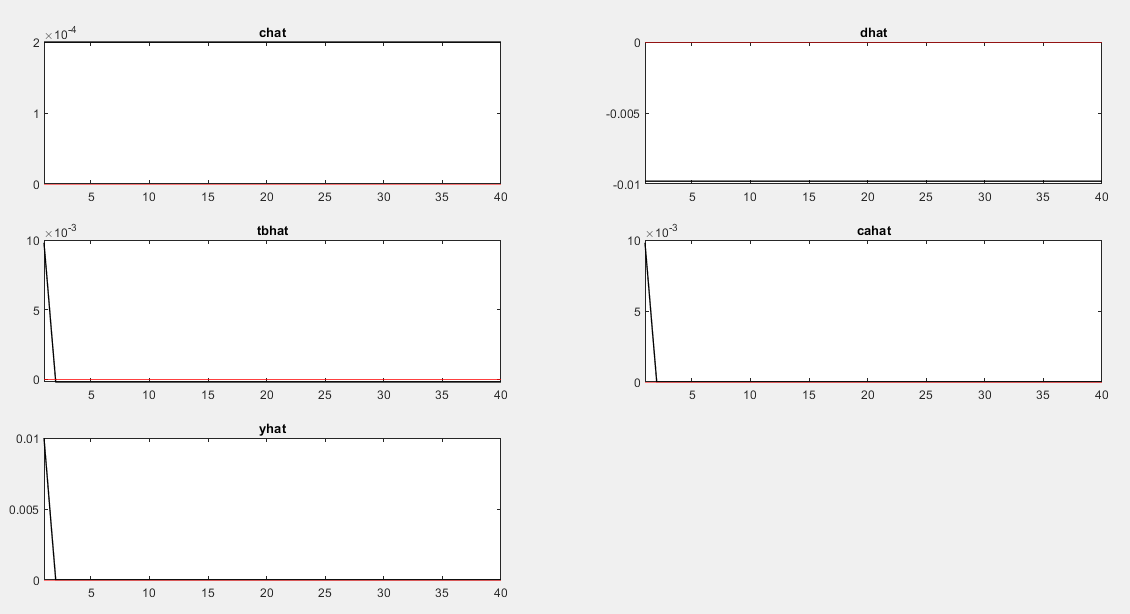

When the temporary endowment shock is i.i.d., equation (69) indicates that only a small share of the rise in $\hat y_t$—specifically the fraction $1-\beta$—is passed on to $\hat c_t$. The bulk of the increase, the fraction $\beta$, is instead saved through foreign bond holdings. Consequently, both $\hat tb_t$ and $\hat ca_t$ rise by $\beta$ (as shown in equations (72) and (73)), while $\hat d_t$ declines by the same amount (see equation (71)).

### Unconditional Second moments (Case 01)

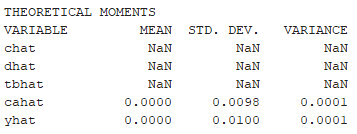

### Impulse-response functions: Endowment is an AR(1) process (Case 02)

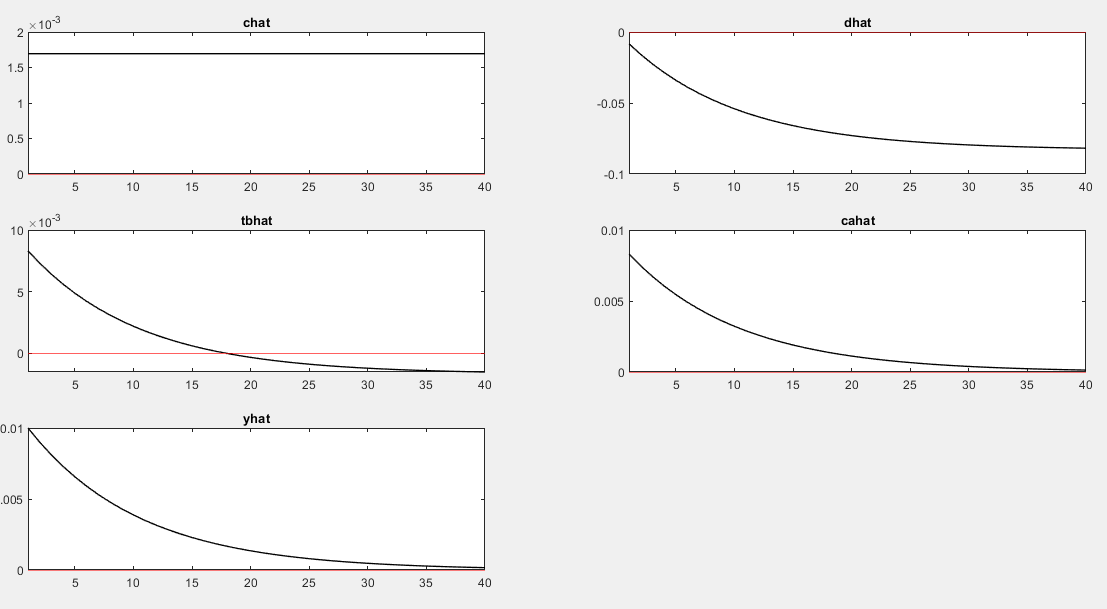

<p style="text-align: justify;">The figure illustrates how the economy reacts to a positive AR(1) endowment shock under the assumption that $\hat d_{-1}=0$. Following the temporary and unexpected increase in endowment, $\hat c_t$ jumps once and for all, though by less than the initial rise in $\hat y_t$. Consequently, both $\hat tb_t$ and $\hat ca_t$ improve on impact. After this initial boost, they gradually move back toward their respective long-run values. In the new steady state, however, $\hat tb_t$ settles below its pre-shock level. The reason is that the economy ultimately reaches a lower level of $\hat d_t$, which requires a smaller trade surplus to service. Hence, while a positive endowment shock leads to a short-run improvement in $\hat tb_t$, it ultimately causes a long-run decline, Uribe & Smichtt-Grohé (2017).</p>

### Unconditional Second moments (Case 02)

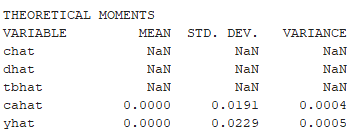

<div class="alert alert-block alert-info">
<b>Note 13:</b> <p style="text-align: justify;"> In both cases, one can see that Dynare, as expected, could not compute the unconditional variances in consumption, debt, or the trade balance, among other variables.</p>
</div>

# Summary of ideas

<p style="text-align: justify;">In the linearized canonical small-open-economy (SOE) model studied here, two configurations of the real endowment process (Cases 01 and 02) were considered. In both specifications the representative household’s budget constraint implies that the debt position $\hat d_t$ accumulates past productivity shocks and therefore behaves as an integrated process of order one, $𝐼(1)$. Concretely, $\hat d_t$ can be written as a deterministic function of the initial conditions plus a sum of past shocks with coefficients that contain a non-vanishing component; accordingly $Δ\hat d_t$ is stationary while $\hat d_t$ itself exhibits a variance that grows without bound.</p>

<p style="text-align: justify;">As a consequence, any endogenous variable that is an affine function of $\hat d_{𝑡−1}$ in the linearized equilibrium —for example consumption $\hat c_t$ in both Case 01 and Case 02, and the trade balance $\hat tb_t$ in Case 02— inherits this nonstationary behaviour in levels. In contrast, variables that depend only on the endowment $\hat y_t$ (for instance the linearized current account $\hat ca_t$ in the two cases considered) remain stationary provided the exogenous process $\hat y_t$ is stationary (i.e. $∣𝜌∣<1$).</p>

<p style="text-align: justify;">Therefore, the unconditional second-order moments (long-run variances, cross-covariances and autocorrelations) of $\hat d_t$, $\hat c_t$ and $\hat tb_t$ do not exist in the sense of convergence to finite constants: their variance grows without bound over time and their long-run covariances and autocorrelations are not well-defined. This feature complicates both the statistical analysis of cycles and any quantitative evaluation based on unconditional moments of the linearized model. To generate stationary dynamics and well-defined unconditional moments, the model must incorporate additional debt-stabilizing elements—such as endogenous discounting, portfolio adjustment costs, debt-elastic interest rates, or alternative external asset accumulation conditions [For further discussion, see Uribe & Schmitt-Grohé (2003, 2017)].</p> 

# Bibliographic references

* <p style="text-align: justify;"> Lubik, T. A. (2007). Non-stationarity and instability in small open economy models even when they are “closed”. Economic Quarterly, 93(4), pp. 393–412. Federal Reserve Bank of Richmond.</p>
* <p style="text-align: justify;">McCandless, G. (2008). The ABCs of RBCs: An Introduction to Dynamic Macroeconomic Models. Harvard University Press.</p>
* <p style="text-align: justify;">Uribe, M., & Schmitt-Grohé, S. (2003). Closing small open economy models. Journal of International Economics, 61, pp. 163–185.</p>
* <p style="text-align: justify;">Uribe, M., & Schmitt-Grohé, S. (2017). Open economy macroeconomics. Princeton University Press.</p>